# Derek Banas Python Tutorial — Colab Walkthrough
Executable notebook covering the major topics from Derek Banas' Python tutorial. Run sequentially; feel free to tweak examples.

In [1]:
# Quick sanity check
import sys
print(sys.version)


3.9.6 (default, Oct 17 2025, 17:15:53) 
[Clang 17.0.0 (clang-1700.4.4.1)]


## Basics: variables, math, strings

In [2]:
# numbers and math
x, y = 7, 3
print('add', x + y)
print('div float', x / y)
print('div int', x // y)
print('power', x ** y)

# strings
s = 'hello world'
print(s.title(), s.upper(), s.replace('l', '*'))
print('slice', s[0:5])
print('format', f'{x=} {y=} -> {x*y}')


add 10
div float 2.3333333333333335
div int 2
power 343
Hello World HELLO WORLD he**o wor*d
slice hello
format x=7 y=3 -> 21


## Collections: list, tuple, set, dict, comprehensions

In [3]:
# list operations
nums = [1, 2, 3]
nums.append(4)
nums.extend([5, 6])
print('list', nums)
print('list comprehension squares', [n*n for n in nums if n%2==0])

# tuple
coords = (10, 20)
print('tuple', coords)

# set
letters = set('banana')
print('set unique letters', letters)

# dict
person = {'name': 'Ada', 'lang': 'Python'}
person['year'] = 1842
print('dict', person)
print('dict keys', list(person.keys()))


list [1, 2, 3, 4, 5, 6]
list comprehension squares [4, 16, 36]
tuple (10, 20)
set unique letters {'a', 'n', 'b'}
dict {'name': 'Ada', 'lang': 'Python', 'year': 1842}
dict keys ['name', 'lang', 'year']


## Conditionals and loops

In [4]:
def fizzbuzz(n):
    for i in range(1, n+1):
        if i % 15 == 0:
            print('fizzbuzz')
        elif i % 3 == 0:
            print('fizz')
        elif i % 5 == 0:
            print('buzz')
        else:
            print(i)

fizzbuzz(15)


1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz


## Functions, *args/**kwargs, lambdas, map/filter/reduce

In [5]:
from functools import reduce

def adder(*args):
    return sum(args)

print('adder', adder(1,2,3,4))

# lambda + map/filter/reduce
nums = list(range(6))
squares = list(map(lambda n: n*n, nums))
evens = list(filter(lambda n: n % 2 == 0, nums))
sum_all = reduce(lambda a,b: a+b, nums, 0)
print('squares', squares)
print('evens', evens)
print('reduce sum', sum_all)


adder 10
squares [0, 1, 4, 9, 16, 25]
evens [0, 2, 4]
reduce sum 15


## Exceptions and context managers

In [6]:
try:
    int('bad')
except ValueError as e:
    print('caught ValueError:', e)

from contextlib import contextmanager

@contextmanager
def open_temp(path):
    f = open(path, 'w')
    try:
        yield f
    finally:
        f.close()

with open_temp('temp.txt') as f:
    f.write('hello')

with open('temp.txt') as f:
    print('file read:', f.read())


caught ValueError: invalid literal for int() with base 10: 'bad'
file read: hello


## Classes, inheritance, magic methods

In [7]:
class Animal:
    def __init__(self, name):
        self.name = name
    def speak(self):
        return '...'
    def __repr__(self):
        return f'Animal(name={self.name!r})'

class Dog(Animal):
    def speak(self):
        return 'woof'

d = Dog('Fido')
print(d, d.speak())


Animal(name='Fido') woof


## Generators, decorators

In [8]:
def count_up(n):
    i = 0
    while i < n:
        yield i
        i += 1

print('generator output', list(count_up(5)))

def log_calls(fn):
    def wrapper(*a, **k):
        print('calling', fn.__name__)
        return fn(*a, **k)
    return wrapper

@log_calls
def greet(who):
    return f'hi {who}'

print(greet('there'))


generator output [0, 1, 2, 3, 4]
calling greet
hi there


## File IO, CSV quick demo

In [9]:
import csv
rows = [
    ['name','age'],
    ['Ada', 36],
    ['Grace', 37],
]
with open('people.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(rows)

with open('people.csv') as f:
    print(f.read())


name,age
Ada,36
Grace,37



## Regex quick peek

In [10]:
import re
text = 'Order number: AB-1234, ref CD-5678'
pattern = r'[A-Z]{2}-\d{4}'
print(re.findall(pattern, text))


['AB-1234', 'CD-5678']


## Modules & imports

In [11]:
import math
print('pi', math.pi)
print('sqrt(16)', math.sqrt(16))


pi 3.141592653589793
sqrt(16) 4.0


## Simple matplotlib plot

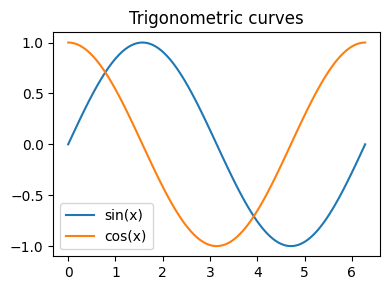

In [12]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
plt.figure(figsize=(4,3))
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()
plt.title('Trigonometric curves')
plt.tight_layout()
plt.savefig('derek_plot.png')
plt.show()
